<IPython.core.display.Javascript object>


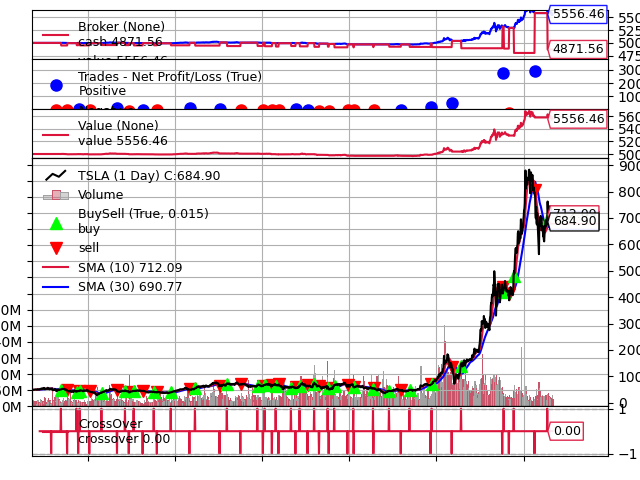

[[<Figure size 640x480 with 6 Axes>]]

In [2]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic


class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

data = bt.feeds.YahooFinanceCSVData(dataname='./daily/TSLA.csv')

cerebro.adddata(data)  # Add the data feed

cerebro.broker.setcash(5_000)
cerebro.addobserver(bt.observers.Value)

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

In [9]:
import backtrader as bt

class PrintClose(bt.Strategy):

    def __init__(self):
        #Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}') #Print date and close

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

#Instantiate Cerebro engine
cerebro = bt.Cerebro()

#Add data feed to Cerebro
data = bt.feeds.YahooFinanceCSVData(dataname='daily/TSLA.csv')
cerebro.adddata(data)

#Add strategy to Cerebro
cerebro.addstrategy(PrintClose)

#Run Cerebro Engine
cerebro.run()

2015-05-04 Close, 46.10
2015-05-05 Close, 46.59
2015-05-06 Close, 46.09
2015-05-07 Close, 47.36
2015-05-08 Close, 47.32
2015-05-11 Close, 47.90
2015-05-12 Close, 48.95
2015-05-13 Close, 48.64
2015-05-14 Close, 48.82
2015-05-15 Close, 49.77
2015-05-18 Close, 49.75
2015-05-19 Close, 49.43
2015-05-20 Close, 48.87
2015-05-21 Close, 49.12
2015-05-22 Close, 49.55
2015-05-26 Close, 49.49
2015-05-27 Close, 49.49
2015-05-28 Close, 50.29
2015-05-29 Close, 50.16
2015-06-01 Close, 49.89
2015-06-02 Close, 49.67
2015-06-03 Close, 49.80
2015-06-04 Close, 49.18
2015-06-05 Close, 49.83
2015-06-08 Close, 51.26
2015-06-09 Close, 51.20
2015-06-10 Close, 50.14
2015-06-11 Close, 50.28
2015-06-12 Close, 50.14
2015-06-15 Close, 50.08
2015-06-16 Close, 50.62
2015-06-17 Close, 52.08
2015-06-18 Close, 52.38
2015-06-19 Close, 52.50
2015-06-22 Close, 51.96
2015-06-23 Close, 53.53
2015-06-24 Close, 53.03
2015-06-25 Close, 53.76
2015-06-26 Close, 53.42
2015-06-29 Close, 52.40
2015-06-30 Close, 53.65
2015-07-01 Close

2021-01-15 Close, 826.16
2021-01-19 Close, 844.55
2021-01-20 Close, 850.45
2021-01-21 Close, 844.99
2021-01-22 Close, 846.64
2021-01-25 Close, 880.80
2021-01-26 Close, 883.09
2021-01-27 Close, 864.16
2021-01-28 Close, 835.43
2021-01-29 Close, 793.53
2021-02-01 Close, 839.81
2021-02-02 Close, 872.79
2021-02-03 Close, 854.69
2021-02-04 Close, 849.99
2021-02-05 Close, 852.23
2021-02-08 Close, 863.42
2021-02-09 Close, 849.46
2021-02-10 Close, 804.82
2021-02-11 Close, 811.66
2021-02-12 Close, 816.12
2021-02-16 Close, 796.22
2021-02-17 Close, 798.15
2021-02-18 Close, 787.38
2021-02-19 Close, 781.30
2021-02-22 Close, 714.50
2021-02-23 Close, 698.84
2021-02-24 Close, 742.02
2021-02-25 Close, 682.22
2021-02-26 Close, 675.50
2021-03-01 Close, 718.43
2021-03-02 Close, 686.44
2021-03-03 Close, 653.20
2021-03-04 Close, 621.44
2021-03-05 Close, 597.95
2021-03-08 Close, 563.00
2021-03-09 Close, 673.58
2021-03-10 Close, 668.06
2021-03-11 Close, 699.60
2021-03-12 Close, 693.73
2021-03-15 Close, 707.94
